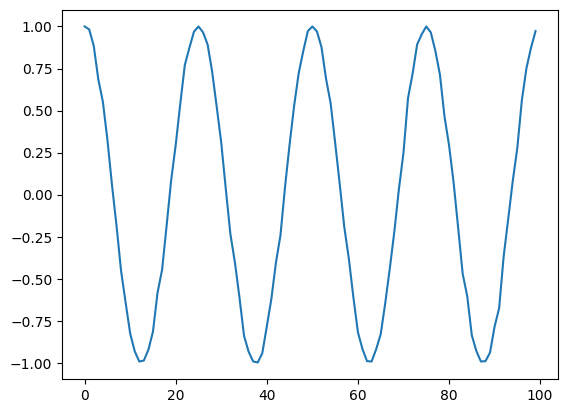

In [1]:
from qiskit import QuantumCircuit, transpile, Aer, assemble,execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
import qiskit.providers.aer.noise as noise
import numpy as np
# Depolarizing quantum errors
error_1 = noise.phase_amplitude_damping_error(0,0.01,1)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['id'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates
nqubits=4
list_res1=[]
Z=np.array([[1,0],[0,-1]])
for k in range(0,100):
    t=k/50
    prob=(1-np.exp(-t**2))/2
    ghz_circuit = QuantumCircuit(nqubits, nqubits)
    evo_gate_matrix = np.array([[0, np.exp(1j*0.5*np.pi*t)], [np.exp(-1j*0.5*np.pi*t), 0]])
    
    # 添加 Hadamard 门到第一个比特上
    ghz_circuit.h(0)

    for k in range(0,nqubits-1):
        ghz_circuit.cx(k, k+1)
    for k in range(nqubits):
        ghz_circuit.unitary(evo_gate_matrix, [k], label='evo')
    for k in range(nqubits):
        ghz_circuit.id(k)
    for k in range(nqubits-2,-1,-1):
        ghz_circuit.cx(k, k+1)

    ghz_circuit.h(0)
    ghz_circuit.measure(0, 0)
    transpiled_circuit = transpile(ghz_circuit, Aer.get_backend('qasm_simulator'))
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(transpiled_circuit, simulator).result()
    counts = result.get_counts()
    probability_0 = sum(value for key, value in counts.items() if key[-1] == '0') / sum(counts.values())
    res1=2*probability_0-1
    list_res1.append(res1)
from matplotlib import pyplot as plt
plt.plot(list_res1)

In [2]:
def gencopy(circuit,nqubegin,nquend,t):
    circuit.h(range(nqubegin,nquend))
    for k in range(nqubegin,nquend-1):
        circuit.cx(k, k+1)
    for k in range(nqubegin,nquend):
        circuit.append(U3Gate(np.pi,0.5 * np.pi * t, -0.5 * np.pi * t),[k])
    for k in range(nquend-1,nqubegin,-1):
        circuit.cx(k-1, k)
    circuit.h(range(nqubegin,nquend))
    return circuit

In [3]:
ghz_circuit = QuantumCircuit(nqubits, nqubits)
print(gencopy(ghz_circuit,0,nqubits,0))

NameError: name 'U3Gate' is not defined

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u3']
  Instructions with noise: ['u3']
  All-qubits errors: ['u3']


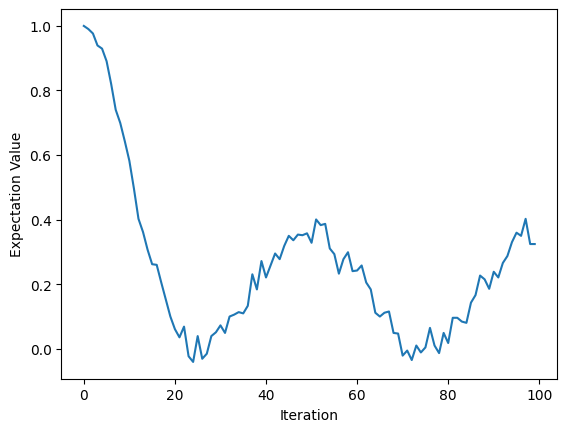

In [6]:
from qiskit import QuantumCircuit, transpile, Aer, execute
import qiskit.providers.aer.noise as noise
from qiskit.circuit.library import U2Gate,U3Gate
import numpy as np


prob_2 = 0.0   # 2-qubit gate

# Depolarizing quantum errors
#error_1 = noise.depolarizing_error(prob_1, 1)
#error_1=noise.phase_damping_error(prob_1, 1)


nqubits = 2
list_res1 = []
Z = np.array([[1, 0], [0, -1]])

for k in range(0, 100):
    t = k / 25
    prob = (1 - np.exp(-t**2)) / 2
    ghz_circuit = QuantumCircuit(nqubits, nqubits)
    error_1=noise.phase_damping_error(prob, 1)
    error_2=noise.depolarizing_error(prob_2, 2)
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['u3'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    # Get basis gates from noise model
    basis_gates = noise_model.basis_gates
    #ghz_circuit=gencopy(ghz_circuit,0,nqubits,t)
    # 添加 Hadamard 门到第一个比特上
    ghz_circuit.h(range(nqubits))

    for l in range(0, nqubits - 1):
        ghz_circuit.cx(l, l + 1)

    for l in range(nqubits):
        ghz_circuit.append(U3Gate(np.pi,0.5 * np.pi * t, 0),[l])

    for l in range(nqubits - 2, -1, -1):
        ghz_circuit.cx(l, l + 1)

    ghz_circuit.h(range(nqubits))
    
    ghz_circuit.measure(0, 0)
    result = execute(ghz_circuit, Aer.get_backend('qasm_simulator'), basis_gates=basis_gates,noise_model=noise_model).result()
    counts = result.get_counts()
    probability_0 = sum(value for key, value in counts.items() if key[-1] == '0') / sum(counts.values())
    res1 = 2 * probability_0 - 1
    list_res1.append(res1)
print(noise_model)
from matplotlib import pyplot as plt
plt.plot(list_res1)
plt.xlabel('Iteration')
plt.ylabel('Expectation Value')
plt.show()


In [134]:
II=np.array([[1,0],[0,1]])
Z=np.array([[1,0],[0,-1]])
operator=Z@II

In [148]:
from qiskit import QuantumCircuit, Aer, execute
import qiskit.providers.aer.noise as noise
from qiskit.circuit.library import U3Gate
import numpy as np

prob_2 = 0.05   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.phase_damping_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

nqubits = 4
list_res1 = []

for k in range(0, 100):
    t = k / 25
    prob = (1 - np.exp(-t**2)) / 2
    ghz_circuit = QuantumCircuit(nqubits)
    error_1 = noise.phase_damping_error(prob, 1)
    error_2 = noise.depolarizing_error(prob_2, 2)
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['u3'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    
    ghz_circuit.h(range(nqubits))

    for l in range(0, nqubits - 1):
        ghz_circuit.cx(l, l + 1)

    for l in range(nqubits):
        ghz_circuit.append(U3Gate(np.pi, 0.5 * np.pi * t, -0.5 * np.pi * t), [l])

    for l in range(nqubits - 2, -1, -1):
        ghz_circuit.cx(l, l + 1)

    ghz_circuit.h(range(nqubits))
    print(ghz_circuit)
    result = execute(ghz_circuit,Aer.get_backend('aer_simulator'), noise_model=noise_model).result()
    density_matrix = result.get_density_matrix()
    res1=np.trace(density_matrix@operator)
    list_res1.append(res1)
print(list_res1)




     ┌───┐     ┌───────────┐                                         ┌───┐
q_0: ┤ H ├──■──┤ U3(π,0,0) ├──────────────────────────────────────■──┤ H ├
     ├───┤┌─┴─┐└───────────┘┌───────────┐                       ┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├──────■──────┤ U3(π,0,0) ├────────────────────■──┤ X ├┤ H ├
     ├───┤└───┘    ┌─┴─┐    └───────────┘┌───────────┐     ┌─┴─┐├───┤└───┘
q_2: ┤ H ├─────────┤ X ├──────────■──────┤ U3(π,0,0) ├──■──┤ X ├┤ H ├─────
     ├───┤         └───┘        ┌─┴─┐    ├───────────┤┌─┴─┐├───┤└───┘     
q_3: ┤ H ├──────────────────────┤ X ├────┤ U3(π,0,0) ├┤ X ├┤ H ├──────────
     └───┘                      └───┘    └───────────┘└───┘└───┘          


AttributeError: Attribute get_density_matrix is not defined

In [150]:
list_vd=[]
N=2
nqu=N*nqubits+1
exp1=[]
exp2=[]
repetitions=10000
for k in range(0, 50):
    t = k / 25
    circ = QuantumCircuit(nqu, 1)
    circ.h(0)
    circ=gencopy(circ,1,nqubits+1,t)
    circ=gencopy(circ,nqubits+1,nqu,t)
    for k in range(1,nqubits+1):
        circ.cswap(0,k,k+nqubits)
    circ.cz(0,1)
    circ.h(0)
    circ.measure(0, 0)
    sim=Aer.get_backend('qasm_simulator')
    result = execute(circ, sim, noise_model=noise_model, shots=repetitions).result()
    counts = result.get_counts()
    probability_0 = counts.get('0', 0) / repetitions
    exp1=2*probability_0-1
    circ = QuantumCircuit(nqu, 1)
    circ.h(0)
    circ=gencopy(circ,1,nqubits+1,t)
    circ=gencopy(circ,nqubits+1,nqu,t)
    for k in range(1,nqubits+1):
        circ.cswap(0,k,k+nqubits)
    circ.h(0)
    circ.measure(0, 0)
    result = execute(circ, sim, noise_model=noise_model, shots=repetitions).result()
    counts = result.get_counts()
    probability_0 = counts.get('0', 0) / repetitions
    exp2=2*probability_0-1
    list_vd.append(exp1/exp2)

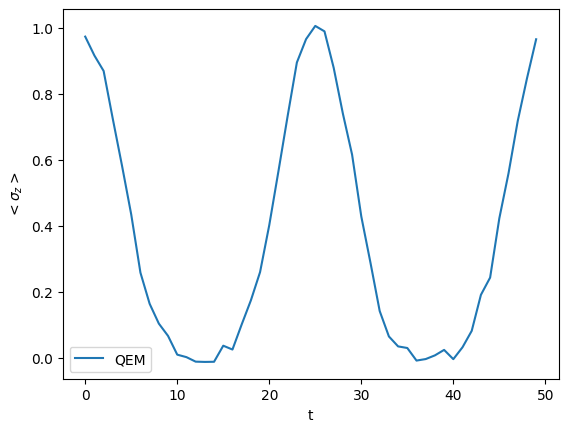

In [151]:
from matplotlib import pyplot as plt
plt.plot(list_vd,label='QEM')
plt.xlabel('t')
plt.ylabel('$<\sigma_{z}>$')
plt.legend()
plt.show()